<a href="https://colab.research.google.com/github/inuwamobarak/google-efficientnet/blob/main/EfficientNetForImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step I: Installing the Transformer Model

In [1]:
# Install required libraries (datasets and transformers) quietly ("-q" option suppresses output)
!pip install -q datasets transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.2/492.2 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.2 MB/s eta 0:00:00


In [2]:
# Import necessary libraries and modules
from transformers import AutoImageProcessor, EfficientNetForImageClassification
import torch
from datasets import load_dataset

import urllib.parse as parse
import os
import requests
import numpy as np
from tqdm import tqdm
from PIL import Image

## Step II: Preparing for Image File

In [3]:
# Determine if a string is a URL
def check_url(string):
    try:
        result = parse.urlparse(string)
        return all([result.scheme, result.netloc, result.path])
    except:
        return False

In [4]:
def load_image(image_path):
    # Check if the image_path is a URL
    if check_url(image_path):
        # If it is a URL, download the image and open it using PIL
        return Image.open(requests.get(image_path, stream=True).raw)
    elif os.path.exists(image_path):
        # If it is a local file path, open the image using PIL
        return Image.open(image_path)

## Step III: Loading Image

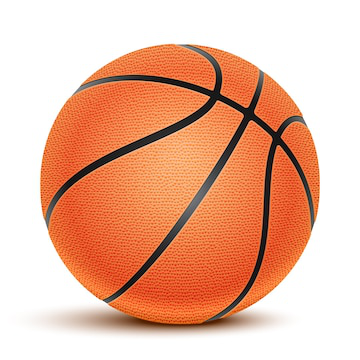

In [5]:
# Load the image from the URL using the 'load_image' function
url = "https://img.freepik.com/free-vector/basketball-ball-isolated_1284-42545.jpg?w=360&t=st=1690303095~exp=1690303695~hmac=e7e894ce025d78fa9e7ee88a3e86b035ed2b8370938a16e65783d5177d05a52a"
image = load_image(url)

# Display the image
image.show()

## Step VI: Loading EfficientNet Transformer

In [6]:
# Load the pre-trained image processor for EfficientNet B7 from Hugging Face's model hub
image_processor = AutoImageProcessor.from_pretrained("google/efficientnet-b7")

# Load the pre-trained EfficientNet B7 model from Hugging Face's model hub
model = EfficientNetForImageClassification.from_pretrained("google/efficientnet-b7")

# Process the loaded image using the image processor, and convert it to PyTorch tensors
inputs = image_processor(image, return_tensors="pt")

# Disable gradient calculations and perform forward pass through the model to get logits
with torch.no_grad():
    logits = model(**inputs).logits

## Step V: Making a Prediction

In [7]:
# Predict the class label with the highest probability from the logits
predicted_label = logits.argmax(-1).item()

# Get the corresponding label from the model's configuration (mapping from index to label)
predicted_class_label = model.config.id2label[predicted_label]

# Print the predicted class label
print(predicted_class_label)

basketball
